### Q1.  Import required libraries and read the dataset.

In [1]:
# Importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

In [2]:
# Loading the dataset
df = pd.read_csv("Apps_data.csv")

### Q2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# To display the first 5 records from the dataframe
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
# To display the last 5 records from the dataframe
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
# To display the random 5 records from the dataframe
df.sample(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
7527,CL Pebble Apps,LIFESTYLE,3.6,67,499k,"5,000+",Free,0,Everyone,Lifestyle,"December 23, 2015",3.5,4.0 and up
6462,"Borneo Bible, BM Bible",BOOKS_AND_REFERENCE,4.9,659,5.0M,"10,000+",Free,0,Everyone,Books & Reference,"August 28, 2017",4.4.5,4.0 and up
3100,UFC,SPORTS,4.0,30840,Varies with device,"1,000,000+",Free,0,Teen,Sports,"May 22, 2018",Varies with device,Varies with device
4342,SPEED L,SHOPPING,4.3,85,2.9M,"50,000+",Free,0,Everyone,Shopping,"June 26, 2018",1.24,4.4 and up
7385,CI Dictionary,FAMILY,4.6,31,3.2M,"1,000+",Free,0,Everyone,Education,"September 1, 2015",1.0,4.0.3 and up


In [6]:
# To display details of each and every feature in the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [7]:
# To display the shape of the dataframe
df.shape

(10841, 13)

In [8]:
# To display the column names of the dataframe
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

### Q3.  Check summary statistics of the dataset. List out the columns that need to be worked upon for model building.


In [9]:
# To dispaly the statistical details of numerical columns
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [10]:
# To dispaly the statistical details of catagorical columns
df.describe(include = 'O')

,App,Category,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,596,1695,1579,10039,10040,8714,842,326,1459,2451


The columns that needed to worked upon are Category ,Reviews, Size, Installs, Type, Price

### Q4. Check if there are any duplicate records in the dataset? if any drop them.

In [11]:
# To display the sum of duplicated records
df.duplicated().sum()

483

In [12]:
# To drop the duplicated rows
df.drop_duplicates(inplace = True, ignore_index=True)

In [13]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Q5. Check the unique categories of the column 'Category', Is there any invalid category? If yes, drop them.

In [14]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [15]:
# To display the unique values
df["Category"].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [16]:
# To display the value count of different categories in the column Category
df["Category"].value_counts()

FAMILY                 1943
GAME                   1121
TOOLS                   843
BUSINESS                427
MEDICAL                 408
PRODUCTIVITY            407
PERSONALIZATION         388
LIFESTYLE               373
COMMUNICATION           366
FINANCE                 360
SPORTS                  351
PHOTOGRAPHY             322
HEALTH_AND_FITNESS      306
SOCIAL                  280
NEWS_AND_MAGAZINES      264
TRAVEL_AND_LOCAL        237
BOOKS_AND_REFERENCE     230
SHOPPING                224
DATING                  196
VIDEO_PLAYERS           175
MAPS_AND_NAVIGATION     137
EDUCATION               130
FOOD_AND_DRINK          124
ENTERTAINMENT           111
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
HOUSE_AND_HOME           80
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
1.9                       1
Name: Category, dtype: int64

I think 1.9 is the typo so I have to remove it

In [17]:
# To drop the Category 1.9 from the feature Category
df.drop(index = df[df['Category'] == '1.9'].index, inplace = True)

### Q6. Check if there are missing values present in the column Rating, If any? drop them and and create a new column as 'Rating_category' by converting ratings to high and low categories(>3.5 is high rest low)

In [18]:
# To display the sum of na values
df["Rating"].isna().sum()

1465

In [19]:
# To drop na values 
df.dropna(subset=["Rating"], inplace=True)

In [20]:
# To reset the index
df = pd.concat([df], ignore_index=True)

In [21]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
# To make a new column rating_category where it is encoded as 'high' for values greater than 3.5 and 'low' for values less than 3.5
df["Rating_category"] = df['Rating'].apply(lambda x: 'high' if x > 3.5 else 'low')

### Q7.  Check the distribution of the newly created column 'Rating_category' and comment on the distribution.


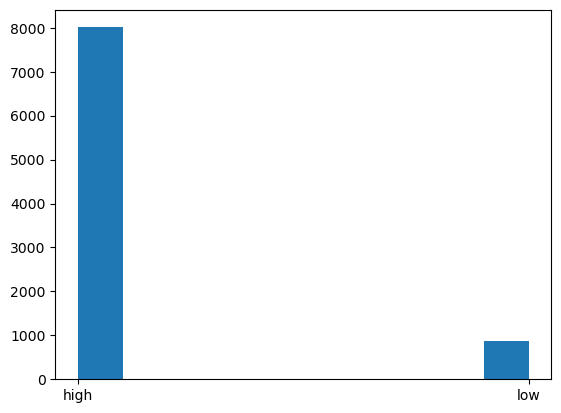

In [23]:
# To check the distribution of the rating_category
plt.hist(df["Rating_category"]);

### Inferences : From the above histogram I can say that there are more apps that have got rating more than 3.5 and very few apps got the rating less than 3.5

### Q8. Convert the column "Reviews'' to numeric data type and check the presence of outliers in the column and handle the outliers using a transformation approach.(Hint: Use log transformation)

In [24]:
# Converting the column reviews to integer datatype
df["Reviews"] = df["Reviews"].astype(int)

<AxesSubplot:xlabel='Reviews'>

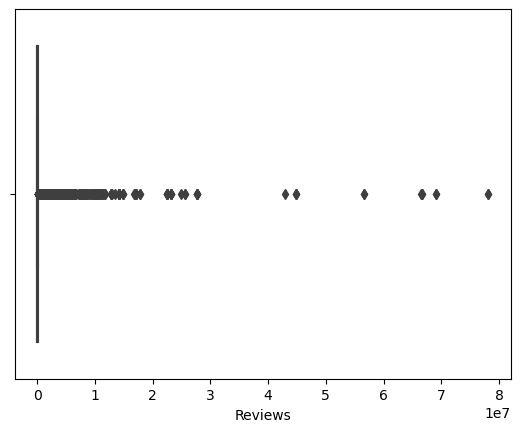

In [25]:
# to see the outliers
sns.boxplot(data = df, x="Reviews")

In [26]:
# Applying log transformation to remove the outliers
df['Reviews'] = df['Reviews'].apply(np.log1p)

### Q9. The column 'Size' contains alphanumeric values, treat the non numeric data and convert the column into suitable data type. (hint: Replace M with 1 million and K with 1 thousand, and drop the entries where size='Varies with device')

In [27]:
# To remove the records where column Size = 'Varies with device'
df.drop(index=df[df['Size'] == 'Varies with device'].index, inplace = True)

In [28]:
# Replacing 'k' with 1000 and 'm' with '1000000' and using eval function we make the expression into numerical values
df['Size'] = df['Size'].str.replace('K','*1000').str.replace('k','*1000').str.replace('M','*1000000').str.replace('m','*1000000').apply(eval).astype(int)

In [29]:
# To reset index
df = pd.concat([df], ignore_index=True)

### Q10. Check the column 'Installs', treat the unwanted characters and convert the column into a suitable data type.


In [30]:
# removing unwanted characters from column Installs
df["Installs"] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)

C:\Users\harir\AppData\Local\Temp\ipykernel_15972\3910164946.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Installs"] = df['Installs'].str.replace(',','').str.replace('+','').astype(int)


### Q11. Check the column 'Price' , remove the unwanted characters and convert the column into a suitable data type.

In [31]:
# removing unwanted characters from column Price
df["Price"] = df["Price"].str.replace('$','').astype(float)

C:\Users\harir\AppData\Local\Temp\ipykernel_15972\1976473215.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Price"] = df["Price"].str.replace('$','').astype(float)


### Q12. Drop the columns which you think redundant for the analysis.(suggestion: drop column 'rating', since we created a new feature from it (i.e. rating_category) and the columns 'App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver' columns since which are redundant for our analysis)


In [32]:
# Droping tje unnecessary columns
df.drop(['App', 'Rating' ,'Genres','Last Updated', 'Current Ver','Android Ver'], axis = 1, inplace = True)

In [33]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,ART_AND_DESIGN,5.075174,19000000,10000,Free,0.0,Everyone,high
1,ART_AND_DESIGN,6.875232,14000000,500000,Free,0.0,Everyone,high
2,ART_AND_DESIGN,11.379520,8700000,5000000,Free,0.0,Everyone,high
3,ART_AND_DESIGN,12.281389,25000000,50000000,Free,0.0,Teen,high
4,ART_AND_DESIGN,6.875232,2800000,100000,Free,0.0,Everyone,high


### Q13. Encode the categorical columns.

In [34]:
# To display the unique values
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [35]:
# Grouping the column category and sorting it by the mean values of the reviews column to use for encoding
df.groupby("Category").mean()["Reviews"].sort_values()

Category
MEDICAL                 4.784712
BUSINESS                5.439305
EVENTS                  5.445994
BEAUTY                  5.939090
LIFESTYLE               6.253113
LIBRARIES_AND_DEMO      6.310419
AUTO_AND_VEHICLES       6.332854
PARENTING               6.550378
BOOKS_AND_REFERENCE     6.604615
FINANCE                 6.671427
ART_AND_DESIGN          6.691203
TOOLS                   6.911544
DATING                  6.963570
PERSONALIZATION         7.012022
COMICS                  7.049502
MAPS_AND_NAVIGATION     7.072877
NEWS_AND_MAGAZINES      7.090047
TRAVEL_AND_LOCAL        7.171315
FAMILY                  7.349449
PRODUCTIVITY            7.447488
HEALTH_AND_FITNESS      7.663061
HOUSE_AND_HOME          7.950866
COMMUNICATION           8.006748
SOCIAL                  8.086350
VIDEO_PLAYERS           8.128150
FOOD_AND_DRINK          8.221933
SPORTS                  8.268644
SHOPPING                8.865134
WEATHER                 8.884715
PHOTOGRAPHY             9.032979
E

In [36]:
# getting the index from the above series which are the list of categories in specific order
category = list(df.groupby("Category").mean()["Reviews"].sort_values().index)

In [37]:
# creating a dictionary to use it for encoding
category_encoding = dict()
for i in range(len(category)):
    category_encoding[category[i]] = i

In [38]:
# encoding data for column category
category_encoding

{'MEDICAL': 0,
 'BUSINESS': 1,
 'EVENTS': 2,
 'BEAUTY': 3,
 'LIFESTYLE': 4,
 'LIBRARIES_AND_DEMO': 5,
 'AUTO_AND_VEHICLES': 6,
 'PARENTING': 7,
 'BOOKS_AND_REFERENCE': 8,
 'FINANCE': 9,
 'ART_AND_DESIGN': 10,
 'TOOLS': 11,
 'DATING': 12,
 'PERSONALIZATION': 13,
 'COMICS': 14,
 'MAPS_AND_NAVIGATION': 15,
 'NEWS_AND_MAGAZINES': 16,
 'TRAVEL_AND_LOCAL': 17,
 'FAMILY': 18,
 'PRODUCTIVITY': 19,
 'HEALTH_AND_FITNESS': 20,
 'HOUSE_AND_HOME': 21,
 'COMMUNICATION': 22,
 'SOCIAL': 23,
 'VIDEO_PLAYERS': 24,
 'FOOD_AND_DRINK': 25,
 'SPORTS': 26,
 'SHOPPING': 27,
 'WEATHER': 28,
 'PHOTOGRAPHY': 29,
 'EDUCATION': 30,
 'GAME': 31,
 'ENTERTAINMENT': 32}

In [39]:
# Encoding the category column
df["Category"] = df["Category"].replace(category_encoding).astype(int)

In [40]:
df.head()

,Category,Reviews,Size,Installs,Type,Price,Content Rating,Rating_category
0,10,5.075174,19000000,10000,Free,0.0,Everyone,high
1,10,6.875232,14000000,500000,Free,0.0,Everyone,high
2,10,11.379520,8700000,5000000,Free,0.0,Everyone,high
3,10,12.281389,25000000,50000000,Free,0.0,Teen,high
4,10,6.875232,2800000,100000,Free,0.0,Everyone,high


In [41]:
# Encoding the column type
df = pd.get_dummies(data = df, columns = ['Type'], drop_first = True)

In [42]:
df.head()

,Category,Reviews,Size,Installs,Price,Content Rating,Rating_category,Type_Paid
0,10,5.075174,19000000,10000,0.0,Everyone,high,0
1,10,6.875232,14000000,500000,0.0,Everyone,high,0
2,10,11.379520,8700000,5000000,0.0,Everyone,high,0
3,10,12.281389,25000000,50000000,0.0,Teen,high,0
4,10,6.875232,2800000,100000,0.0,Everyone,high,0


In [43]:
# To display the content Rating's unique values
df["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

In [44]:
# Creating a dictionary for encoding
content_encoding = {'Everyone' : 5, 'Everyone 10+' : 4, 'Teen' : 3, 'Mature 17+' : 2, 'Adults only 18+' : 1, 'Unrated' : 0}

In [45]:
# Encoding the Content Rating column
df["Content Rating"] = df["Content Rating"].replace(content_encoding)

In [46]:
df.head()

,Category,Reviews,Size,Installs,Price,Content Rating,Rating_category,Type_Paid
0,10,5.075174,19000000,10000,0.0,5,high,0
1,10,6.875232,14000000,500000,0.0,5,high,0
2,10,11.379520,8700000,5000000,0.0,5,high,0
3,10,12.281389,25000000,50000000,0.0,3,high,0
4,10,6.875232,2800000,100000,0.0,5,high,0


In [47]:
# Encoding the Rating_category column
df["Rating_category"] = df["Rating_category"].replace({'high':1,'low':0})

In [48]:
df.dtypes

Category             int32
Reviews            float64
Size                 int32
Installs             int32
Price              float64
Content Rating       int64
Rating_category      int64
Type_Paid            uint8
dtype: object

In [49]:
df.head()

,Category,Reviews,Size,Installs,Price,Content Rating,Rating_category,Type_Paid
0,10,5.075174,19000000,10000,0.0,5,1,0
1,10,6.875232,14000000,500000,0.0,5,1,0
2,10,11.379520,8700000,5000000,0.0,5,1,0
3,10,12.281389,25000000,50000000,0.0,3,1,0
4,10,6.875232,2800000,100000,0.0,5,1,0


### Q14.Segregate the target and independent features (Hint: Use Rating_category as the target)

In [50]:
# Segregating the X and y where x is independent features and y is dependent features
X = pd.concat([df.iloc[:,:-2],df.iloc[:,-1]], axis = 1, ignore_index=True)
y = df.iloc[:,-2]

### Q16.  Standardize the data, so that the values are within a particular range

In [51]:
# Creating the minmaxscaler index
scaler = MinMaxScaler()

In [52]:
# transforming and fitting the data
df1 = scaler.fit_transform(df.iloc[:,:-2])

In [53]:
# Converting the array to dataframe
df1 = pd.DataFrame(df1)

In [54]:
# Giving the names for the columns
df1.rename(columns={i: df.columns[i] for i in range(6)}, inplace=True)

In [55]:
# concating the 
df = pd.concat([df1,df.iloc[:,-2:]], axis=1)

### Q15. Split the dataset into train and test

In [56]:
# Splitting the dataset into x_train and x_test , y_train and y_test
X_train, x_test, Y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [57]:
log_reg = LogisticRegression()

In [58]:
log_reg.fit(X_train, Y_train)

LogisticRegression()

In [59]:
log_reg.score(X_train,Y_train)

0.8893379522709777

In [60]:
log_reg.score(x_test,y_test)

0.8877917414721723